# 航空公司客户价值分析

#### 航空公司已积累了大量的会员档案信息和其乘坐航班记录，经过加工得到部分数据信息

根据这些数据实现以下目标：

1、借助航空公司客户数据，对客户进行分类

2、对不同的客户类别进行特征分析，比较不同类客户的客户价值

3、对不同价值的客户类别提供个性化服务，制定相应的营销策略


### RFM模型，作用是识别高价值的客户

#### 识别客户价值，应用最广泛的模型是三个指标（消费时间间隔recency；消费频率frequency；消费金额monetary）

### LRFMC模型：作为航空公司识别客户价值指标

#### 消费时间间隔R；客户关系长度L；消费频率F；飞行里程M和折扣系数的平均值C

## 1、 数据抽取

### 1.1 数据探索分析

In [30]:
import pandas as pd
import numpy as np

In [40]:
data=pd.read_csv(r"D:\Entertainment\jyputer\Jyputer\Airline Customer Value Analysis\demo\data\air_data.csv")

In [41]:
data.head(5)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,ADD_Point_SUM,Eli_Add_Point_Sum,L1Y_ELi_Add_Points,Points_Sum,L1Y_Points_Sum,Ration_L1Y_Flight_Count,Ration_P1Y_Flight_Count,Ration_P1Y_BPS,Ration_L1Y_BPS,Point_NotFlight
0,54993,2006/11/02,2008/12/24,男,6,.,北京,CN,31.0,2014/03/31,...,39992,114452,111100,619760,370211,0.509524,0.490476,0.487221,0.512777,50
1,28065,2007/02/19,2007/08/03,男,6,NaN,北京,CN,42.0,2014/03/31,...,12000,53288,53288,415768,238410,0.514286,0.485714,0.489289,0.510708,33
2,55106,2007/02/01,2007/08/30,男,6,.,北京,CN,40.0,2014/03/31,...,15491,55202,51711,406361,233798,0.518519,0.481481,0.481467,0.518530,26
3,21189,2008/08/22,2008/08/23,男,5,Los Angeles,CA,US,64.0,2014/03/31,...,0,34890,34890,372204,186100,0.434783,0.565217,0.551722,0.448275,12
4,39546,2009/04/10,2009/04/15,男,6,贵阳,贵州,CN,48.0,2014/03/31,...,22704,64969,64969,338813,210365,0.532895,0.467105,0.469054,0.530943,39


1、客户基本信息：MEMBER_NO 会员卡号；FFP_DATE 入会时间

2、客户基本信息：FIRST_FLIGHT_DATE 第一次飞行日期；GENDER 性别；FFP_TIER 会员卡级别；work_city 工作地城市；
work_provence 工作地所在省份；work_country 工作地所在国家；age：年龄

3、乘机信息：flight_count:观测窗口内的飞行次数；load_time:观测窗口的结束时间；last_to_end:最后一次乘机时间至观测
            窗口结束时长；avg_discount:平均折扣率；sum_yr:观测窗口的票价收入；seg_km_sum:观测窗口的总飞行公里数
            last_flight_date:末次飞行日期；avg_interval:平均乘机时间间隔；max_interval:最大乘机间隔

4、积分信息：exchange_count：积分兑换次数；ep_sum:总精英积分；promoptive_sum:促销积分；pratner_sum：合作伙伴积分； points_sum:总累计积分；point_notflight:非乘机的积分变动次数；bp_sum:总基本积分

观测窗口：以过去某个时间点为结束时间，某一时间长度作为宽度，得到历史时间范围内的一个时间段

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 44 columns):
MEMBER_NO                  62988 non-null int64
FFP_DATE                   62988 non-null object
FIRST_FLIGHT_DATE          62988 non-null object
GENDER                     62985 non-null object
FFP_TIER                   62988 non-null int64
WORK_CITY                  60719 non-null object
WORK_PROVINCE              59740 non-null object
WORK_COUNTRY               62962 non-null object
AGE                        62568 non-null float64
LOAD_TIME                  62988 non-null object
FLIGHT_COUNT               62988 non-null int64
BP_SUM                     62988 non-null int64
EP_SUM_YR_1                62988 non-null int64
EP_SUM_YR_2                62988 non-null int64
SUM_YR_1                   62437 non-null float64
SUM_YR_2                   62850 non-null float64
SEG_KM_SUM                 62988 non-null int64
WEIGHTED_SEG_KM            62988 non-null float64
LAST_FLIGHT_

In [33]:
explore=data.describe(percentiles=[],include='all').T
# 包括对数据的基本描述，percentiles参数是指定计算多少的分位数表（如1/4分位数，中位数等），
# T是转置，转置后更方便查阅
print(explore)
# describe函数自动计算非空值数，需要手动计算空值数

                         count unique         top   freq      mean       std  \
MEMBER_NO                62988    NaN         NaN    NaN   31494.5   18183.2   
FFP_DATE                 62988   3068  2011/01/13    184       NaN       NaN   
FIRST_FLIGHT_DATE        62988   3406  2013/02/16     96       NaN       NaN   
GENDER                   62985      2           男  48134       NaN       NaN   
FFP_TIER                 62988    NaN         NaN    NaN   4.10216  0.373856   
WORK_CITY                60719   3310          广州   9385       NaN       NaN   
WORK_PROVINCE            59740   1185          广东  17507       NaN       NaN   
WORK_COUNTRY             62962    118          CN  57748       NaN       NaN   
AGE                      62568    NaN         NaN    NaN   42.4763   9.88591   
LOAD_TIME                62988      1  2014/03/31  62988       NaN       NaN   
FLIGHT_COUNT             62988    NaN         NaN    NaN   11.8394   14.0495   
BP_SUM                   62988    NaN   

In [34]:
outfile='D:\Entertainment\jyputer\Jyputer\Airline Customer Value Analysis\explore.xls'#探索结果分析表
explore['null']=len(data)-explore['count'] #计算空值个数
explore=explore[['null','max','min']] #获取数据的空值个数，每一列的最大值和最小值
explore.columns=[u'空值数',u'最大数',u'最小值'] #表头重命名
print('--------------------------------------------------')
print(explore)
explore.to_excel(outfile) #导出结果

--------------------------------------------------
                          空值数       最大数   最小值
MEMBER_NO                   0     62988     1
FFP_DATE                    0       NaN   NaN
FIRST_FLIGHT_DATE           0       NaN   NaN
GENDER                      3       NaN   NaN
FFP_TIER                    0         6     4
WORK_CITY                2269       NaN   NaN
WORK_PROVINCE            3248       NaN   NaN
WORK_COUNTRY               26       NaN   NaN
AGE                       420       110     6
LOAD_TIME                   0       NaN   NaN
FLIGHT_COUNT                0       213     2
BP_SUM                      0    505308     0
EP_SUM_YR_1                 0         0     0
EP_SUM_YR_2                 0     74460     0
SUM_YR_1                  551    239560     0
SUM_YR_2                  138    234188     0
SEG_KM_SUM                  0    580717   368
WEIGHTED_SEG_KM             0    558440     0
LAST_FLIGHT_DATE            0       NaN   NaN
AVG_FLIGHT_COUNT            0

### 1.2 数据预处理

由于原始数据中存在缺失值，票价最小值为0，折扣率最小值为0而飞行公里数大于0的记录，又因为原始数据
量大，这些记录所占的比例较小，所以可将这些记录删除

1、丢弃票价为空记录；2、丢弃票价为0，平均折扣率不为0，总飞行公里数大于0的记录

In [35]:
import pandas as pd
data=pd.read_csv(r"D:\Entertainment\jyputer\Jyputer\Airline Customer Value Analysis\demo\data\air_data.csv",encoding='utf-8') #读取原始数据，指定URF-8编码
cleanedfile='D:\Entertainment\jyputer\Jyputer\Airline Customer Value Analysis\cleanedfile.xls'
data=data[data['SUM_YR_1'].notnull()& data['SUM_YR_2'].notnull()]
# 票价非空值才保留；只保留票价非0的或者平均折扣率与总飞行公里数同时为0的记录
index1=data['SUM_YR_1']!=0
index2=data['SUM_YR_2']!=0
index3=(data['SEG_KM_SUM']==0)&(data['avg_discount']==0)
data=data[index1|index2|index3]#该规则是“或”
print(data)
data.to_excel(cleanedfile)#导出清洗后的数据

       MEMBER_NO    FFP_DATE FIRST_FLIGHT_DATE GENDER  FFP_TIER  \
0          54993  2006/11/02        2008/12/24      男         6   
1          28065  2007/02/19        2007/08/03      男         6   
2          55106  2007/02/01        2007/08/30      男         6   
3          21189  2008/08/22        2008/08/23      男         5   
4          39546  2009/04/10        2009/04/15      男         6   
5          56972  2008/02/10        2009/09/29      男         6   
6          44924  2006/03/22        2006/03/29      男         6   
7          22631  2010/04/09        2010/04/09      女         6   
8          32197  2011/06/07        2011/07/01      男         5   
9          31645  2010/07/05        2010/07/05      女         6   
10         58877  2010/11/18        2010/11/20      女         6   
11         37994  2004/11/13        2004/12/02      男         6   
12         28012  2006/11/23        2007/11/18      男         5   
13         54943  2006/10/25        2007/10/27      男         

## 2、属性规约

原始数据中属性太多，根据航空公司客户价值LRFMC模型，选择与LRFMC指标相关的6个属性：
FFP_DATE(入会时间),LOAD_TIME(观测窗口的结束时间),FLIGHT_COUNT(观测窗口内的飞行次数)、AVG_DISCOUNT(平均折扣率)、
SEG_KM_SUM(观测窗口的总飞行公里数)、LAST_TO_END(最后一次乘机时间至观测窗口结束时长),删除
与其不相关。弱相关或冗余的属性。经过属性选择后的数据集。

### 2.1  数据变换

#### LRFMC（客户关系长度L;消费时间间隔R;消费频率F;飞行里程M;折扣系数的平均值C）五个指标：

L=LOAD_TIME-FFP_DATE:会员入会时间距观测窗口结束的月数=观测窗口的结束时间-入会时间
    
R=LAST_TO_END:客户最近一次乘坐公司飞机距观测窗口结束的月数=最后一次乘坐时间至观测窗口末端时长

F=FLIGHT_COUNT:客户在观测窗口内乘坐公司飞机的次数=观测窗口的飞行次数
    
M=SEG_KM_SUM:客户在观测时间内在公司累计的飞行里程=观测窗口的总飞行公里数

C=AVG_DISCOUNT:客户在观测时间内乘坐舱位所对应的折扣系数的平均值=平均折扣率

In [1]:
import pandas as pd
cleanedfile='D:\Entertainment\jyputer\Jyputer\Airline Customer Value Analysis\cleanedfile.xls'#清洗过的数据
processfile='D:\Entertainment\jyputer\Jyputer\Airline Customer Value Analysis\zscored.xls' # 属性构造的结果
data=pd.read_excel(cleanedfile,encoding='utf-8') # 读取文件
data.index=range(0,len(data)) # 清洗过的数据索引从0开始
import datetime
import time
for i in range(len(data)):
    data.loc[i,'s1']=datetime.datetime.strptime(data.loc[i,'LOAD_TIME'],'%Y/%m/%d')#将字符串格式转化为日期格式
    data.loc[i,'s2']=datetime.datetime.strptime(data.loc[i,'FFP_DATE'],'%Y/%m/%d')

data['入会时间 L']=(data['s1']-data['s2'])/30  #以30为单位计算日期相差的月数
data['消费时间间隔 R']=data['LAST_TO_END']
data['飞行次数 F']=data['FLIGHT_COUNT']
data['总里程 M']=data['SEG_KM_SUM']
data['平均折扣率 C']=data['avg_discount']
data=data[['入会时间 L','消费时间间隔 R','飞行次数 F','总里程 M','平均折扣率 C']] # 重新构造属性的数据集
print(data[0:5])
print(data.info())
data.to_excel(processfile)

In [2]:
import pandas as pd
filename='D:\Entertainment\jyputer\Jyputer\Airline Customer Value Analysis\zscored.xls'#属性构造后的数据
zscorefile='D:\Entertainment\jyputer\Jyputer\Airline Customer Value Analysis\zscoreddata.xls'#标准化后的数据
data=pd.read_excel(filename,encoding='utf-8')
data=(data-data.mean(axis=0))/data.std(axis=0) #标准化处理
print(data[0:5])
data.to_excel(zscorefile)

# axis=0表示列，axis=1表示行（axis是轴的意思）

     入会时间 L  消费时间间隔 R     飞行次数 F      总里程 M   平均折扣率 C
0  1.435707 -0.944948  14.034016  26.761154  1.295540
1  1.307152 -0.911894   9.073213  13.126864  2.868176
2  1.328381 -0.889859   8.718869  12.653481  2.880950
3  0.658476 -0.416098   0.781585  12.540622  1.994714
4  0.386032 -0.922912   9.923636  13.898736  1.344335


## 3、模型构建

### 3.1 客户聚类

对于K-means方法，k的取值是一个难点，因为是无监督的聚类分析问题，所以不存在绝对正确的值，需要进行
研究试探。这里采用计算SSE的方法，尝试找到最好的k数值。

#### 使用肘部法则估计聚类数目：如果问题中没有指定聚类数目k的值，可以通过肘部法则来估计聚类数量。

肘部法则会把不同k值的成本函数值画出来。随着k值得增大，平均畸变程度会减小；每个类包含的样本数会减少，于是样本离其重心会更近。但是，随着K值继续增大，平均畸变程度的改善效果会不断减低。k值增大过程中，畸变程度的改善效果下降幅度最大的位置对应的k值就是肘部。

#### 需要解释的一点：每个类的畸变程度等于该类重心与其内部成员位置距离的平方和。也就是我们前面所说的每个类的类内离差平方和。若类内部的成员彼此间越紧凑则类的畸变程度越小，反之，若类内部的成员彼此间越分散则类的畸变程度越大。

聚类算法 from sklearn.cluster import KMeans 

1、输入参数：n_clusters:要分成的簇数也是要生成的质心数(int);init:初始化质心;n_init: 设置选择质心种子次数，默认为10次。返回质心最好的一次结果（好是指计算时长短）;
            max_iter：每次迭代的最大次数;tol: 容忍的最小误差，当误差小于tol就会退出迭代（算法中会依赖数据本身）;
            n_jobs: 使用进程的数量，与电脑的CPU有关
                
2、输出参数：label_:每个样本对应的簇类别标签；cluster_centers_：聚类中心

In [33]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans #导入K-均值聚类算法
# k_means聚类算法位于scikit_learn库下的聚类子库（sklearn.cluster）
filename='D:\Entertainment\jyputer\Jyputer\Airline Customer Value Analysis\zscoreddata.xls'
data=pd.read_excel(filename,encoding='utf-8')
# 计算两个向量的欧式距离的平方，并返回
def distEclud(vecA,vecB):
    return np.sum(np.power(vecA-vecB,2))

# 计算不同的k值时，SSE的大小变化
def test_Kmeans_nclusters(data_train):
    data_trian=data_train.values
    nums=range(2,10)
    SSE=[]
    for num in nums:
        sse=0
        # 调用kmeans算法，进行聚类分析
        kmodel=KMeans(n_clusters=num,n_jobs=4)  # n_clusters:要分成的簇数也就是生成的质心数，n_jobs并行数，一般等于菜cpu数目
        kmodel.fit(data_train) # 训练模型
        
        # 找出聚类中心
        cluster_ceter_list=kmodel.cluster_centers_
        # 统计各个类别的数目
        cluster_list=kmodel.labels_.tolist() # to_list（）将数组和矩阵转化为列表

        # 分为num类，同时用%time（%time km.fit(data_train)）来测定运行时间，把分类标签labels格式变为list
        
        sse=kmodel.inertia_
        
        # for index in range(len(data)):
            #cluster_num=cluster_list[index]
            #sse+=distEclud(data_train[index,:],cluster_ceter_list[cluster_num])
        print(u"簇数是",num,u"时；SSE是",sse)
        SSE.append(sse) # append（）将元素添加到已有list的末尾，多用于for.in 循环
    return nums,SSE

    
nums,SSE=test_Kmeans_nclusters(data)

簇数是 2 时；SSE是 229344.90680960665
簇数是 3 时；SSE是 184343.94862352242
簇数是 4 时；SSE是 151010.7805997851
簇数是 5 时；SSE是 133360.08860757778
簇数是 6 时；SSE是 118067.14418195382
簇数是 7 时；SSE是 107633.45693554601
簇数是 8 时；SSE是 100706.27563872359
簇数是 9 时；SSE是 93871.95982464119


轮廓系数的使用：https://www.plob.org/article/12351.html

In [34]:
print(nums,SSE)

range(2, 10) [229344.90680960665, 184343.94862352242, 151010.7805997851, 133360.08860757778, 118067.14418195382, 107633.45693554601, 100706.27563872359, 93871.95982464119]


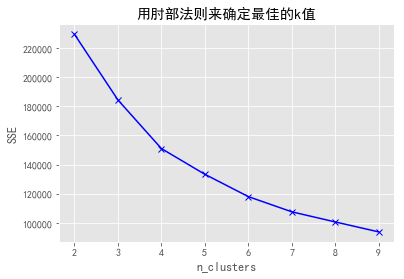

In [36]:
# 画图，通过观测SSE与k值的取值尝试找出合适的k值
import matplotlib.pyplot as plt

# 绘画观测SSE和簇个数的关系
plt.plot(nums,SSE,'bx-')
plt.xlabel("n_clusters")
plt.ylabel("SSE")
plt.title(u'用肘部法则来确定最佳的k值')
plt.show()

观测图像，并没有的所谓的“肘”点出现，是随着k值的增大逐渐减少的，这里选取当k分别取4,5,6时
进行，看能不能通过分析结果来反向选取更合适的值，k取值4时的代码如下

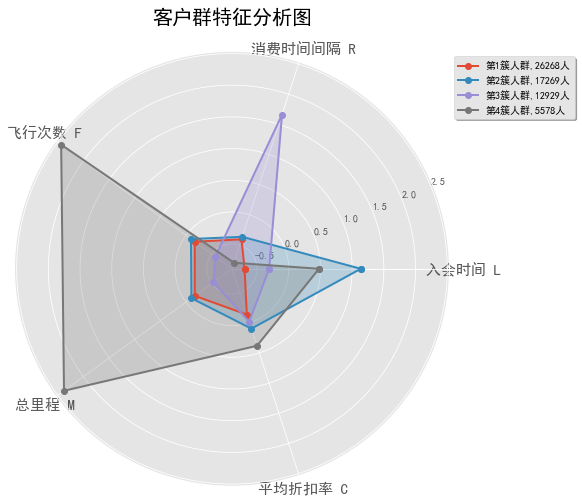

In [42]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans #导入K-均值聚类算法
# k_means聚类算法位于scikit_learn库下的聚类子库（sklearn.cluster）
filename='D:\Entertainment\jyputer\Jyputer\Airline Customer Value Analysis\zscoreddata.xls'
data=pd.read_excel(filename,encoding='utf-8')
kmodel=KMeans(n_clusters=4,n_jobs=4)
kmodel.fit(data)

# 简单打印结果
r1=pd.Series(kmodel.labels_).value_counts()# 统计各个类别的数目
r2=pd.DataFrame(kmodel.cluster_centers_)#找出聚类中心
# 所有簇中心坐标值中最大值和最小值
max=r2.values.max()
min=r2.values.min()
r=pd.concat([r2,r1],axis=1)#横向连接（0是纵向），得到聚类中心对应的类别下的数目
r.columns=list(data.columns)+[u'类别数目']#重命名表头

# 绘画
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111,polar=True)
center_num=r.values

feature = ['入会时间 L','消费时间间隔 R','飞行次数 F','总里程 M','平均折扣率 C']
N =len(feature)
for i, v in enumerate(center_num):
    # 设置雷达图的角度，用于平分切开一个圆面
    angles=np.linspace(0, 2*np.pi, N, endpoint=False)
    # 为了使雷达图一圈封闭起来，需要下面的步骤
    center = np.concatenate((v[:-1],[v[0]]))
    angles=np.concatenate((angles,[angles[0]]))
    # 绘制折线图
    ax.plot(angles, center, 'o-', linewidth=2, label = "第%d簇人群,%d人"% (i+1,v[-1]))
    # 填充颜色
    ax.fill(angles, center, alpha=0.25)
    # 添加每个特征的标签
    ax.set_thetagrids(angles * 180/np.pi, feature, fontsize=15)
    # 设置雷达图的范围
    ax.set_ylim(min-0.1, max+0.1)
    # 添加标题
    plt.title('客户群特征分析图', fontsize=20)
    # 添加网格线
    ax.grid(True)
    # 设置图例
    plt.legend(loc='upper right', bbox_to_anchor=(1.3,1.0),ncol=1,fancybox=True,shadow=True)
    
# 保存图片 save
plt.savefig(r'D:\Entertainment\jyputer\Jyputer\Airline Customer Value Analysis\cluster_four.png')

# 显示图形
plt.show()


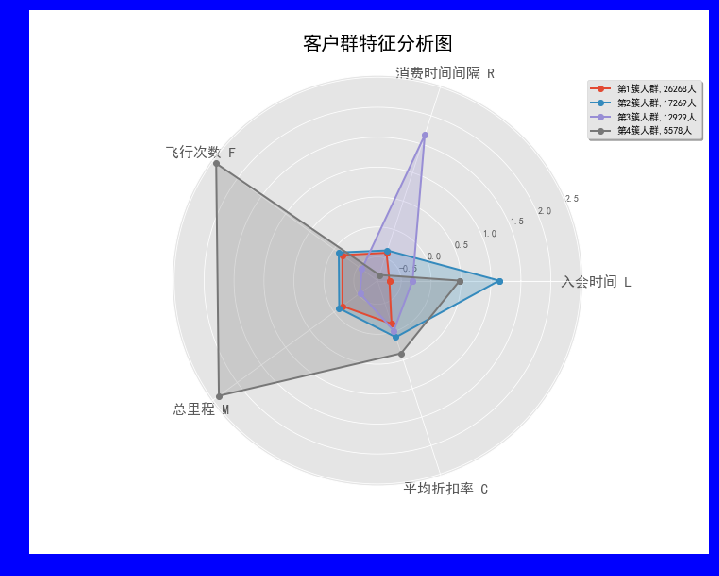

In [54]:
import matplotlib.pyplot as plt # plt 用于显示图片
import matplotlib.image as mping #mping用于读取图片
import numpy as np
from scipy import misc # 对图像进行放缩

four=mping.imread(r'D:\Entertainment\jyputer\Jyputer\Airline Customer Value Analysis\cluster_four.png')
# 读取和代码处于同一目录下的four.png, 此时four就已经是一个np.array,可以对它进行任意处理
plt.figure(figsize=(15,10),facecolor="b")# 改变图片的大小
# figsize：指定figure的宽和高，单位为英寸；facecolor：背景颜色；edgecolor：边框颜色；
# frameon：是否显示边框
plt.imshow(four)# x显示图片
plt.axis('off') #不显示坐标轴
plt.show()

## 小插曲······

### 1、time模块
1.time():用来获取时间戳，表示的结果为从1970年1月1日开始计算到现在时间之间的秒数

In [51]:
time.time() # 时间戳:指从1970年01月01日00时00分00秒(北京时间1970年01月01日08时00分00秒)起至现在的总秒数。

1550994946.1138718

2.localtime():获取当前时间信息，包含年月日时分秒等等。返回结果以元组的形式返回

In [52]:
time.localtime()

time.struct_time(tm_year=2019, tm_mon=2, tm_mday=24, tm_hour=15, tm_min=57, tm_sec=25, tm_wday=6, tm_yday=55, tm_isdst=0)

3.strftime():将localtime()中获取的时间元组转换为自定义的日期时间格式进行

In [56]:
time.strftime('%Y-%m-%d %H:%M:%S',time.localtime())

'2019-02-24 16:02:23'

### 2、datetime模块: from datetime（库）import date（类）

#### 2.1 datetime模块中包含的如下类：

1、date：表示日期的类，常用的属性有year，month，day

2、time：表示时间的类，常用的属性有hour,minute,second,microsecond,tzoninfo

3、datetime：表示日期时间的类，常用的属性有year，month，day，hour,minute,second

4、datetime_CAPI：日期时间对象C语言接口

5、timedelta：时间间隔，即两个时间点之间的长度

6、tzinfo：时区信息对象

In [66]:
from datetime import *  # 不知道用啥，全部导入就可以用*

#### 2.2  各类中的函数

##### time类中的函数

1.datetime.date.ctime(),返回格式如 Sun Apr 16 00:00:00 2017

2.datetime.date.fromtimestamp(timestamp),根据给定的时间戮，返回一个date对象；datetime.date.today()作用相同

3.datetime.date.isocalendar():返回格式如(year，month，day)的元组,(2017, 15, 6)

4.datetime.date.isoformat()：返回格式如YYYY-MM-DD

5.datetime.date.isoweekday()：返回给定日期的星期（0-6）星期一=0，星期日=6 这里表明下python3中是从[1-7]表示的 就是本来是星期几现在显示就是星期几

6.datetime.date.replace(year,month,day)：替换给定日期，但不改变原日期

##### time类中的函数

1.datetime.time.replace()

2.datetime.time.strftime(format):按照format格式返回时间

3.datetime.time.tzname()：返回时区名字

4.datetime.time.utcoffset()：返回时区的时间偏移量

##### datetime类中的函数

datetime.datetime.ctime()

datetime.datetime.now().date()：返回当前日期时间的日期部分

datetime.datetime.now().time()：返回当前日期时间的时间部分

datetime.datetime.fromtimestamp()

datetime.datetime.now()：返回当前系统时间

datetime.datetime.replace()

datetime.datetime.strftime()：由日期格式转化为字符串格式

　　datetime.datetime.now().strftime('%b-%d-%Y %H:%M:%S')
　　'Apr-16-2017 21:01:35'

datetime.datetime.strptime():由字符串格式转化为日期格式
    
     datetime.datetime.strptime('Apr-16-2017 21:01:35', '%b-%d-%Y %H:%M:%S')
     2017-04-16 21:01:35